In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [4]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
df.sample(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
30241,2718,3,3,Suburb,1983,277447.932905
45786,2341,5,3,Suburb,1975,275363.375583
21956,2951,3,3,Suburb,2014,322021.766783
39217,2738,3,3,Urban,2019,275673.791359
32903,1643,3,3,Suburb,2005,143349.546622


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [8]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

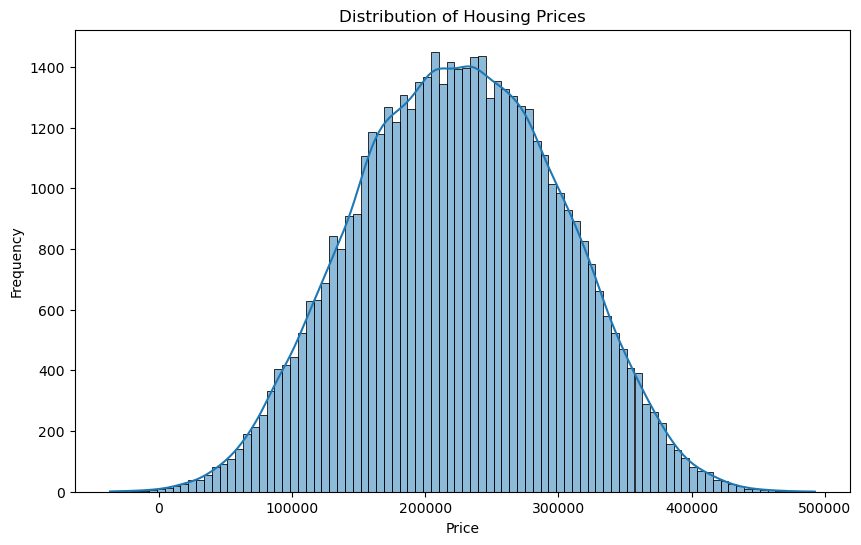

In [9]:
#EDA-DATA VISUALIZATION
# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

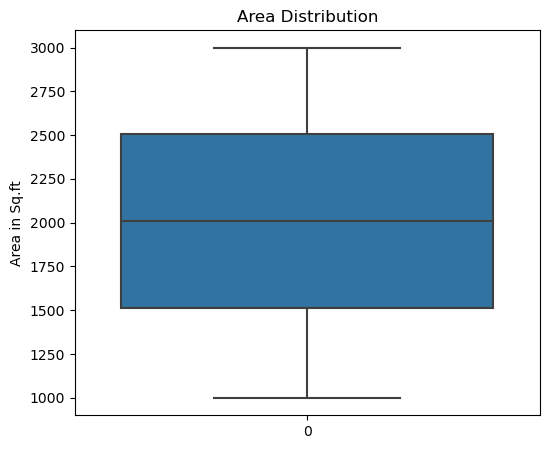

In [10]:
# Box Plot of Numerical Features
plt.figure(figsize=(6,5))
sns.boxplot(data=df['SquareFeet'])
plt.title('Area Distribution')
plt.ylabel("Area in Sq.ft")
plt.show()

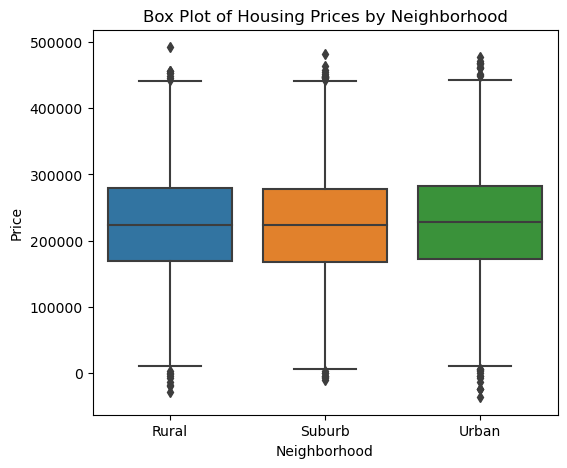

In [11]:
# Box Plot of Categorical Features
plt.figure(figsize=(6,5))
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Box Plot of Housing Prices by Neighborhood')
plt.show()

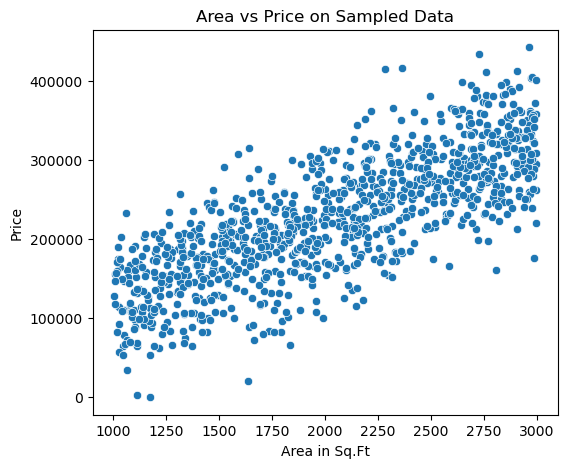

In [12]:
#scatter plot of Area vs Price on Sampled data
sampled_data = df.sample(n=1000, random_state=42)
# Scatter Plot with Sampled Data
plt.figure(figsize=(6,5))
sns.scatterplot(x='SquareFeet', y='Price', data=sampled_data)
plt.title('Area vs Price on Sampled Data')
plt.xlabel("Area in Sq.Ft")
plt.ylabel("Price")
plt.show()

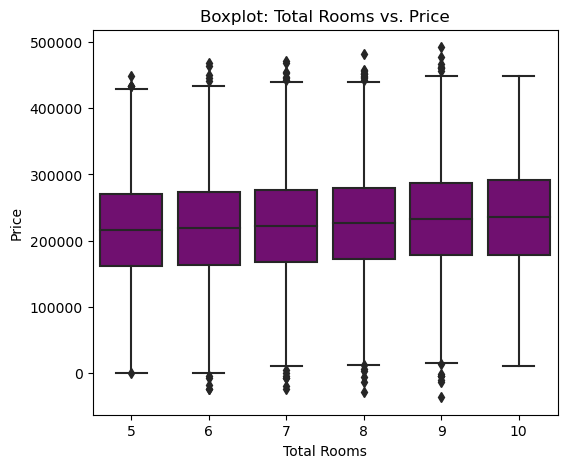

In [13]:
# Create a new feature 'TotalRooms' by adding the number of rooms
df['TotalRooms'] = df['Bedrooms'] + df['Bathrooms'] + 2  # +2 indicates presence of living room and kitchen

# Filter out extreme values for better visualization
filtered_data = df[(df['SquareFeet'] < 5000) & (df['Price'] < 500000)]

#price distribution by number of total rooms
plt.figure(figsize=(6,5))
sns.boxplot(x='TotalRooms', y='Price', data=filtered_data, color='purple')
plt.title('Boxplot: Total Rooms vs. Price')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.show()



In [14]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,TotalRooms
0,2126,4,1,Rural,1969,215355.283618,7
1,2459,3,2,Rural,1980,195014.221626,7
2,1860,2,1,Suburb,1970,306891.012076,5
3,2294,2,1,Urban,1996,206786.787153,5
4,2130,5,2,Suburb,2001,272436.239065,9
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,10
49996,2854,2,2,Suburb,1988,374507.656727,6
49997,2979,5,3,Suburb,1962,384110.555590,10
49998,2596,5,2,Rural,1984,380512.685957,9


In [15]:
#DATA PREPROCESSING
#Encoding categorical variable values using One-Hot Encoding
categorical_features = ['Neighborhood']  # Include 'Neighborhood' as a categorical feature
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'TotalRooms']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different preprocessing steps to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
#DATA SPLITTING
# Define features (X) and target variable (y)
x = df.drop('Price', axis=1)
y = df['Price']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
#MODEL SELECTION
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Random Forest Regressor': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting Regressor': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))]),
    'Support Vector Machines (SVM)': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR())]),
    'Decision Tree Regressor': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(random_state=42))]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}")
    print(f"{model_name} - Mean Absolute Error: {mae:.2f}")
    print(f"{model_name} - R-squared: {r2:.2f}")
    print()

Linear Regression - Mean Squared Error: 2436241619.99
Linear Regression - Mean Absolute Error: 39430.07
Linear Regression - R-squared: 0.58

Random Forest Regressor - Mean Squared Error: 2763906976.86
Random Forest Regressor - Mean Absolute Error: 41917.23
Random Forest Regressor - R-squared: 0.52

Gradient Boosting Regressor - Mean Squared Error: 2442959875.41
Gradient Boosting Regressor - Mean Absolute Error: 39471.52
Gradient Boosting Regressor - R-squared: 0.57

Support Vector Machines (SVM) - Mean Squared Error: 5565426001.10
Support Vector Machines (SVM) - Mean Absolute Error: 60751.87
Support Vector Machines (SVM) - R-squared: 0.03

Decision Tree Regressor - Mean Squared Error: 5222217421.52
Decision Tree Regressor - Mean Absolute Error: 57979.44
Decision Tree Regressor - R-squared: 0.09

XGBoost - Mean Squared Error: 2547989251.68
XGBoost - Mean Absolute Error: 40254.18
XGBoost - R-squared: 0.56



In [18]:
#MODEL CREATION-USING LINEAR REGRESSION PIPELINE
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [19]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SquareFeet', 'Bedrooms',
                                                   'Bathrooms', 'YearBuilt',
                                                   'TotalRooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood'])])),
                ('regressor', LinearRegression())])

In [20]:
#PREDICTION STEP
# Make predictions on the testing data
y_pred = model.predict(x_test)

In [21]:
#MODEL EVALUATION
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 39430.07
Mean Squared Error: 2436241619.99
R-squared: 0.58


In [22]:
y_pred

array([218322.    , 135007.    , 255243.    , ..., 310665.75  ,
       200892.6875, 244028.25  ])